In [1]:
# libs itialization
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
import sys
import string
import random as r
from prettytable import PrettyTable
import networkx as nx
from collections import defaultdict
import scipy.sparse as sp

In [2]:
# list of values for Huffman algorithm
Hu_code = {}
Sl_code = {}
Hu_name = []
Hu_value = []
Hu_len = []
Sl_len = []
th = []
td = []
fh = []
fd = []

In [3]:
# simple random text generator using weighted lowecase ascii letters (letters weight from https://360wiki.ru/wiki/Letter_frequency)
def weighted_random(weights):
    number = r.random() * sum(weights.values())
    for k,v in weights.items():
        if number < v:
            break
        number -= v
    return k

prob_dict = {
    'a':	8.2,
    'b':	1.5,
    'c':	2.8,
    'd':	4.3,
    'e':	13.,
    'f':	2.2,
    'g':	2.,
    'h':	6.1,
    'i':	7.,
    'j':	0.15,
    'k':	0.77,
    'l':	4.,
    'm':	2.4,
    'n':	6.7,
    'o':	7.5,
    'p':	1.9,
    'q':	0.095,
    'r':	6.,
    's':	6.3,
    't':	9.1,
    'u':	2.8,
    'v':	0.98,
    'w':	2.4,
    'x':	0.15,
    'y':	2.,
    'z':	0.074
    }

In [4]:
# Algorithm which searches the frequency of each english letter in the file
def findTheCharFrequency(text):
    freq = dict()
    with open(text,'r') as f:
        for line in f.readlines():
            line = line.lower()
            for i in line:
                if i.isalpha():
                    if i in freq:
                        freq[i] += 1
                    else:
                        freq.update({i:1})
    return freq

In [5]:
# Simular length binary letters dictionary creation
zer0 = '00000'
for i in range (0, 26):
    Sl_code[ str(string.ascii_letters)[i:-(51-i)] ] = zer0[:-(len(bin(i+1))-2)] + bin(i+1)[2:]
print(Sl_code)

{'a': '00001', 'b': '00010', 'c': '00011', 'd': '00100', 'e': '00101', 'f': '00110', 'g': '00111', 'h': '01000', 'i': '01001', 'j': '01010', 'k': '01011', 'l': '01100', 'm': '01101', 'n': '01110', 'o': '01111', 'p': '10000', 'q': '10001', 'r': '10010', 's': '10011', 't': '10100', 'u': '10101', 'v': '10110', 'w': '10111', 'x': '11000', 'y': '11001', 'z': '11010'}


In [6]:
# node class creation
class Node(object):
    def __init__(self, name=None, value=None):
        self.name = name
        self.value = value
        self.lchild = None
        self.rchild = None

# Huffman tree creation
class HuffmanTree(object):
    # Based on node we built the tree in reverse algorithm
    def __init__(self, char_Weights):
        self.Leaf = [Node(k,v) for k, v in char_Weights.items()]
        while len(self.Leaf) != 1:
            self.Leaf.sort(key=lambda node:node.value, reverse=True)
            n = Node(value=(self.Leaf[-1].value + self.Leaf[-2].value))
            n.lchild = self.Leaf.pop(-1)
            n.rchild = self.Leaf.pop(-1)
            self.Leaf.append(n)
        self.root = self.Leaf[0]
        self.Buffer = list(range(10))

    def Hu_generate(self, tree, length):
        node = tree
        if (not node):
            return
        elif node.name:
            n = node.name
            b = str()
            for i in range(length):
                b += str(self.Buffer[i])
            Hu_code[n] = b
            Hu_name.append(n)
            Hu_value.append(b)
            return
        self.Buffer[length] = 0
        self.Hu_generate(node.lchild, length + 1)
        self.Buffer[length] = 1
        self.Hu_generate(node.rchild, length + 1)

    # Output part
    def get_code(self):
        self.Hu_generate(self.root, 0)

In [7]:
def Hu_generation (s_number):
    f = open('weightedRtext.txt', 'w')
    for i in range (0, s_number):
        f.write(weighted_random(prob_dict))
    f.close()
    text = r'weightedRtext.txt'
    l_frequency = findTheCharFrequency(text)

    # Printing full algorithm result
    tree = HuffmanTree(l_frequency)
    tree.get_code()

In [8]:
# here are functions for encryption with Huffman algorithm dictionary and with simular length dictionary
def HuEncryptWord(word):
    return ''.join([Hu_code[x] for x in word])
def SlEncryptWord(word):
    return ''.join([Sl_code[x] for x in word])
plot_len = []
for i in range (100, 1500, 100):
    Hu_generation(i)
    f = open('weightedRtext.txt')
    for word in f.read().split():
        Hu_len.append( len(HuEncryptWord(word)) )
        Sl_len.append( len(SlEncryptWord(word)) )
        plot_len.append( i )
    f.close()


In [9]:
# Printing first algorithm result as a table of letter frequency
text = r'weightedRtext.txt'
l_frequency = findTheCharFrequency(text)
for key, value in sorted(l_frequency.items()): # sorted(l_frequency.items(), key=lambda item: item[1])
    th.append(key)
    td.append(value)
columns = len(th)
f_table = PrettyTable(th)
while td:
    f_table.add_row(td[:columns])
    td = th[columns:]
print(f_table)

# Printing full algorithm result
tree = HuffmanTree(l_frequency)
tree.get_code()

# the reason of duplication of function is that this is another sorting algorithm 
for key, value in sorted(l_frequency.items(), key=lambda item: item[1]): #sorted(l_frequency.items()): - previous one
        fh.append(key)
        fd.append(value)

for i in range (0, len(fh)):
        for j in range (0, len(fh)):
            if Hu_name[j] == fh[i]:
                fd[i] = [fd[i], Hu_value[j]]
# Hu_table = PrettyTable()
# for i in range(0, len(fh)):
#     Hu_table.add_column(fh[i], fd[i])
# print(Hu_table)
# print(fd)
# print(l_frequency)
print(Hu_code)

+-----+----+----+----+-----+----+----+----+-----+---+---+----+----+----+----+----+---+----+----+-----+----+----+----+---+----+---+
|  a  | b  | c  | d  |  e  | f  | g  | h  |  i  | j | k | l  | m  | n  | o  | p  | q | r  | s  |  t  | u  | v  | w  | x | y  | z |
+-----+----+----+----+-----+----+----+----+-----+---+---+----+----+----+----+----+---+----+----+-----+----+----+----+---+----+---+
| 108 | 21 | 49 | 63 | 184 | 29 | 25 | 92 | 107 | 2 | 9 | 51 | 32 | 90 | 91 | 21 | 2 | 81 | 87 | 124 | 47 | 19 | 36 | 6 | 23 | 1 |
+-----+----+----+----+-----+----+----+----+-----+---+---+----+----+----+----+----+---+----+----+-----+----+----+----+---+----+---+
{'d': '0010', 's': '0101', 'i': '1101', 'v': '001110', 'p': '011000', 'r': '0100', 'h': '1001', 'l': '11110', 'e': '101', 'n': '0111', 'f': '111110', 'j': '001111100', 'w': '00110', 'y': '110000', 'a': '1110', 'o': '1000', 't': '000', 'u': '01101', 'c': '11001', 'g': '110001', 'k': '0011110', 'b': '011001', 'm': '111111', 'q': '0011111011', 'x

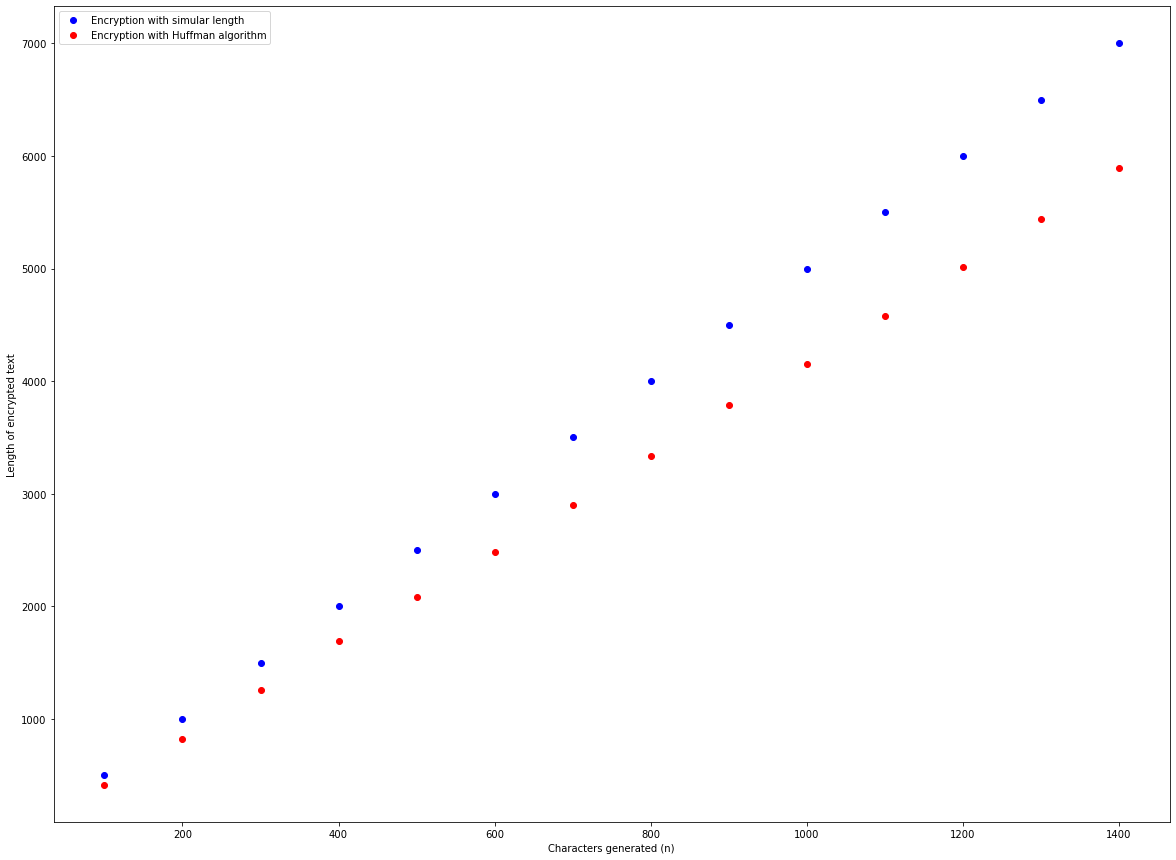

In [26]:
plt.figure(figsize=(20,15))
plt.plot(plot_len, Sl_len,'bo', label='Encryption with simular length')
plt.plot(plot_len, Hu_len, 'ro', label='Encryption with Huffman algorithm')
plt.ylabel('Length of encrypted text', fontsize=10)
plt.xlabel('Characters generated (n)', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [11]:
# list of values for Prim algorithm
vert = 50
edge = 200
adj_m = np.zeros([vert, vert])
prim_m = np.zeros([vert, vert])
INF = 9999999

In [12]:
# Prim algorithm
class Graph: 
	def __init__(self, V, G):
		self.V = V
		self.G = G

	def prim(self):
		selected = [0] * self.V
		no_edge = 0
		selected[0] = True
		#Нужно выбрать V-1
		while (no_edge < self.V - 1):
			minimum = INF
			x = 0
			y = 0
			# Пересечение V-образных узлов
			for i in range(V):
				#Выбрано этим узлом
				if selected[i]:
					for j in range(self.V):
						#Выбранные соседние узлы не выбраны и имеют ребра
						if ((not selected[j]) and self.G[i][j]):  
							if minimum > self.G[i][j]:
								minimum = self.G[i][j]
								x = i
								y = j
			#generated path is adding in the empty adjacency matrix
			prim_m[x,y] = self.G[x][y]
			prim_m[y,x] = self.G[x][y]
			selected[y] = True
			no_edge += 1


In [13]:
#adjacency matrix generation
for i in range(0, vert):
    for j in range(i+1, vert):
        randedge=r.randint(0,100)
        adj_m[i,j] = randedge
        adj_m[j,i] = randedge
print(adj_m)

[[ 0. 15. 15. ... 31. 59. 99.]
 [15.  0. 14. ... 45. 36. 86.]
 [15. 14.  0. ... 48. 67. 62.]
 ...
 [31. 45. 48. ...  0. 76. 42.]
 [59. 36. 67. ... 76.  0. 89.]
 [99. 86. 62. ... 42. 89.  0.]]


In [14]:
#graph parameters initialization
def get_matrix_triad(coo_matrix , data=False):
	if not sp.isspmatrix_coo(coo_matrix):
		coo_matrix = sp.coo_matrix(coo_matrix)
	temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
	return temp.tolist()

In [15]:
V = 50
graph = Graph(vert,adj_m)
graph.prim()
print(prim_m)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Prim algorithm result')

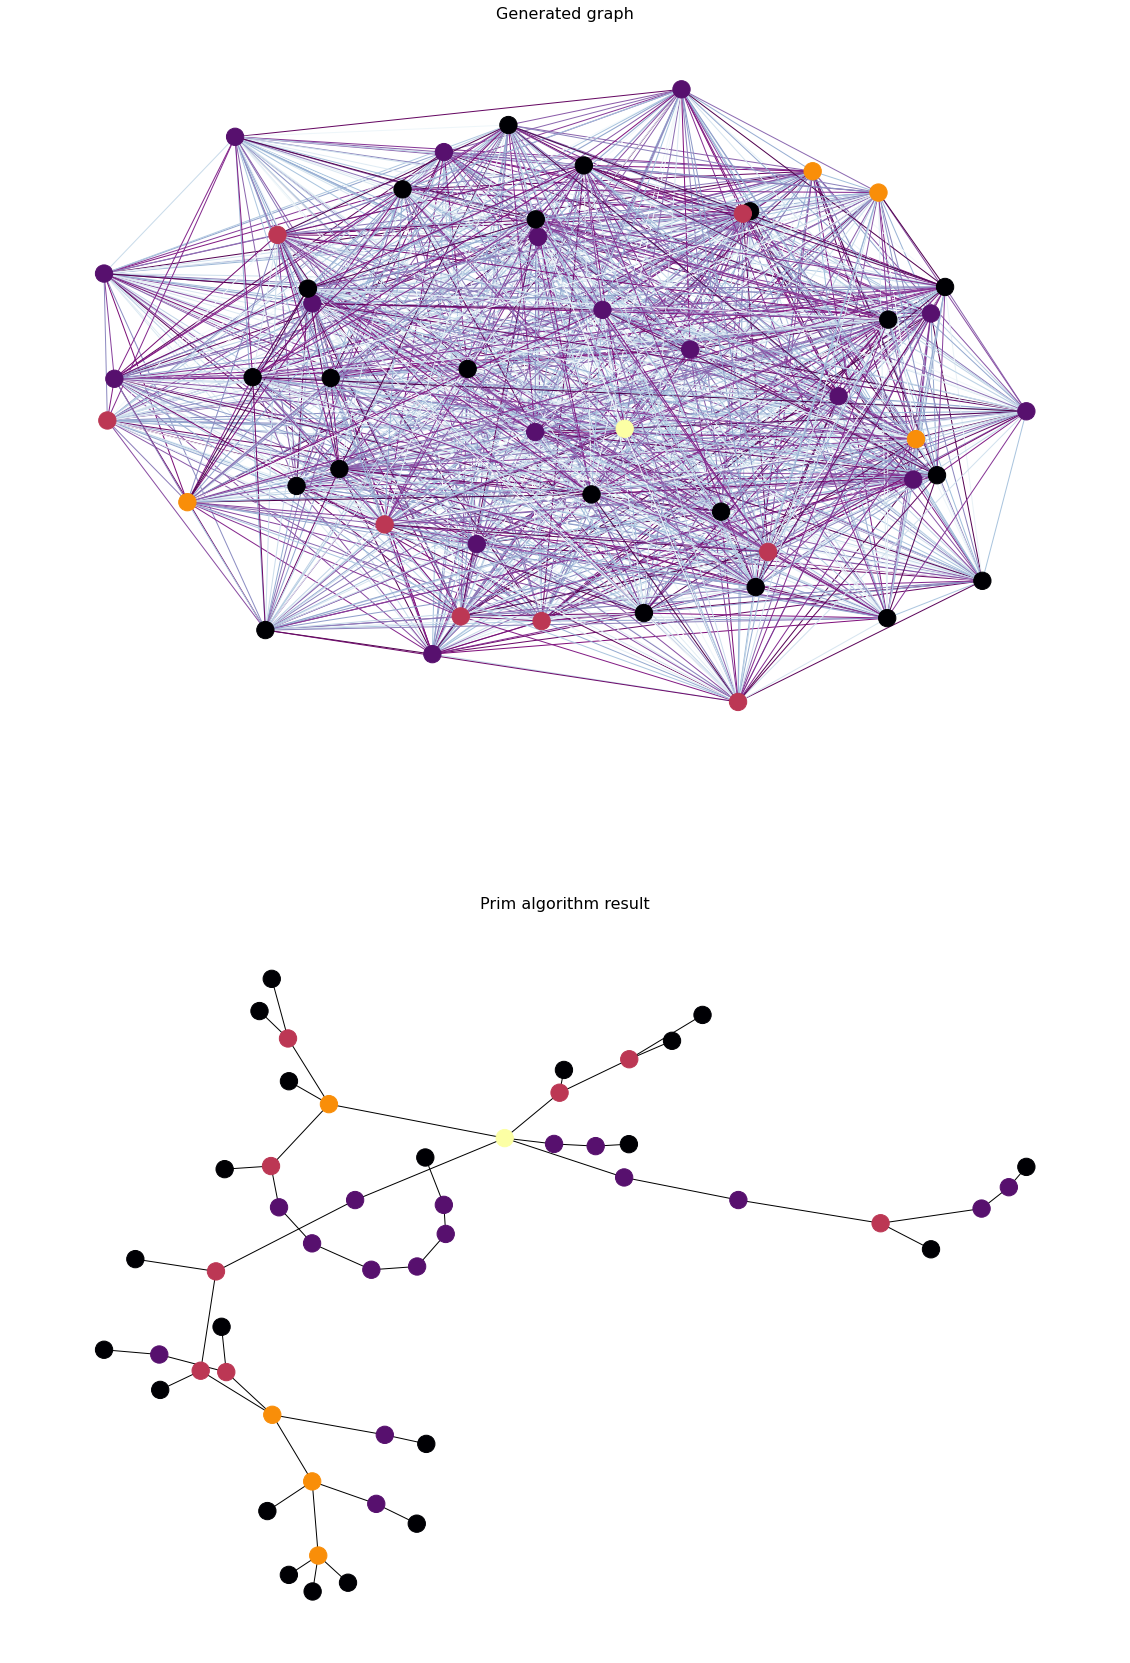

In [28]:
#graphs initialization
edags = get_matrix_triad(adj_m)
primags = get_matrix_triad(prim_m)

G = nx.Graph()
H = nx.path_graph(adj_m.shape[0])
G.add_nodes_from(H)
G.add_weighted_edges_from(edags)
c_degree = nx.degree_centrality(G)
c_degree = list(c_degree.values())
#A color map is created according to the weight of the links. 
#The higher the weight (from 0 to 100, cm adjacency matrix generator), 
#the darker the element in accordance with the specified type of color map plt.cm
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

P = nx.Graph()
L = nx.path_graph(prim_m.shape[0])
P.add_nodes_from(L)
P.add_weighted_edges_from(primags)
c_degree = nx.degree_centrality(P)
c_degree = list(c_degree.values())
# this time no need to create colormap, cause in the idea of algorithm we have choosen the the smallest in weight way

plt.figure(figsize=(20, 30))# Degree Centrality
f, axarr = plt.subplots(2, num=1)
plt.sca(axarr[0])
nx.draw(G, pos = nx.spring_layout(G), node_color=c_degree, node_size = 300, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.BuPu, cmap = plt.get_cmap('inferno'))
axarr[0].set_title('Generated graph', size=16)
plt.sca(axarr[1])
nx.draw(P, pos = nx.spring_layout(P), node_color=c_degree, node_size = 300, cmap = plt.get_cmap('inferno'))
axarr[1].set_title('Prim algorithm result', size=16)
